In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# 1) Explore & Clean

In [2]:
df = pd.read_csv("life_expectancy_data_updated.csv") ## load data

In [3]:
df.shape ## check rows and columns

(2864, 21)

In [4]:
df.head() # top of table

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
df.tail() ## bottom of table

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8
2863,Iceland,Rest of Europe,2011,2.1,2.6,50.5745,6.840,88,90,26.1,...,95,0.05,48934,0.32,0.9,0.9,11.0,1,0,82.4


In [6]:
## make life expectancy first column to work with
last_column = df.pop(df.columns[-1])
df.insert(0, 'Life_expectancy', last_column)

In [7]:
df.isnull().sum()

Life_expectancy                0
Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
dtype: int64

In [8]:
df.dtypes

Life_expectancy                float64
Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
dtype: object

In [9]:
df.drop('Country', axis=1, inplace=True)

In [10]:
df.columns

Index(['Life_expectancy', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing'],
      dtype='object')

In [11]:
df.describe()

,Life_expectancy,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,68.856075,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296
std,9.405608,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012
min,39.400000,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000
25%,62.700000,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000
50%,71.400000,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000
75%,75.400000,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000
max,83.800000,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000


In [12]:
df.corr()

C:\Users\mms\AppData\Local\Temp\ipykernel_16624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Life_expectancy,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
Life_expectancy,1.000000,1.743589e-01,-0.920032,-0.920419,-0.945360,0.399159,0.417804,0.490019,0.598423,0.641217,0.627541,-0.553027,0.583090,0.026298,-0.467824,-0.458166,0.732484,5.237910e-01,-5.237910e-01
Year,0.174359,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15
Infant_deaths,-0.920032,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01
Under_five_deaths,-0.920419,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01
Adult_mortality,-0.945360,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01
Alcohol_consumption,0.399159,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01
Hepatitis_B,0.417804,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01
Measles,0.490019,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01
BMI,0.598423,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01
Polio,0.641217,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01


In [13]:
column = 'Life_expectancy'
df.corr()[[column]].abs().sort_values(column, ascending=False)
    

C:\Users\mms\AppData\Local\Temp\ipykernel_16624\2290028424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[[column]].abs().sort_values(column, ascending=False)


,Life_expectancy
Life_expectancy,1.000000
Adult_mortality,0.945360
Under_five_deaths,0.920419
Infant_deaths,0.920032
Schooling,0.732484
Polio,0.641217
Diphtheria,0.627541
BMI,0.598423
GDP_per_capita,0.583090
Incidents_HIV,0.553027


C:\Users\mms\AppData\Local\Temp\ipykernel_16624\2818758095.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))


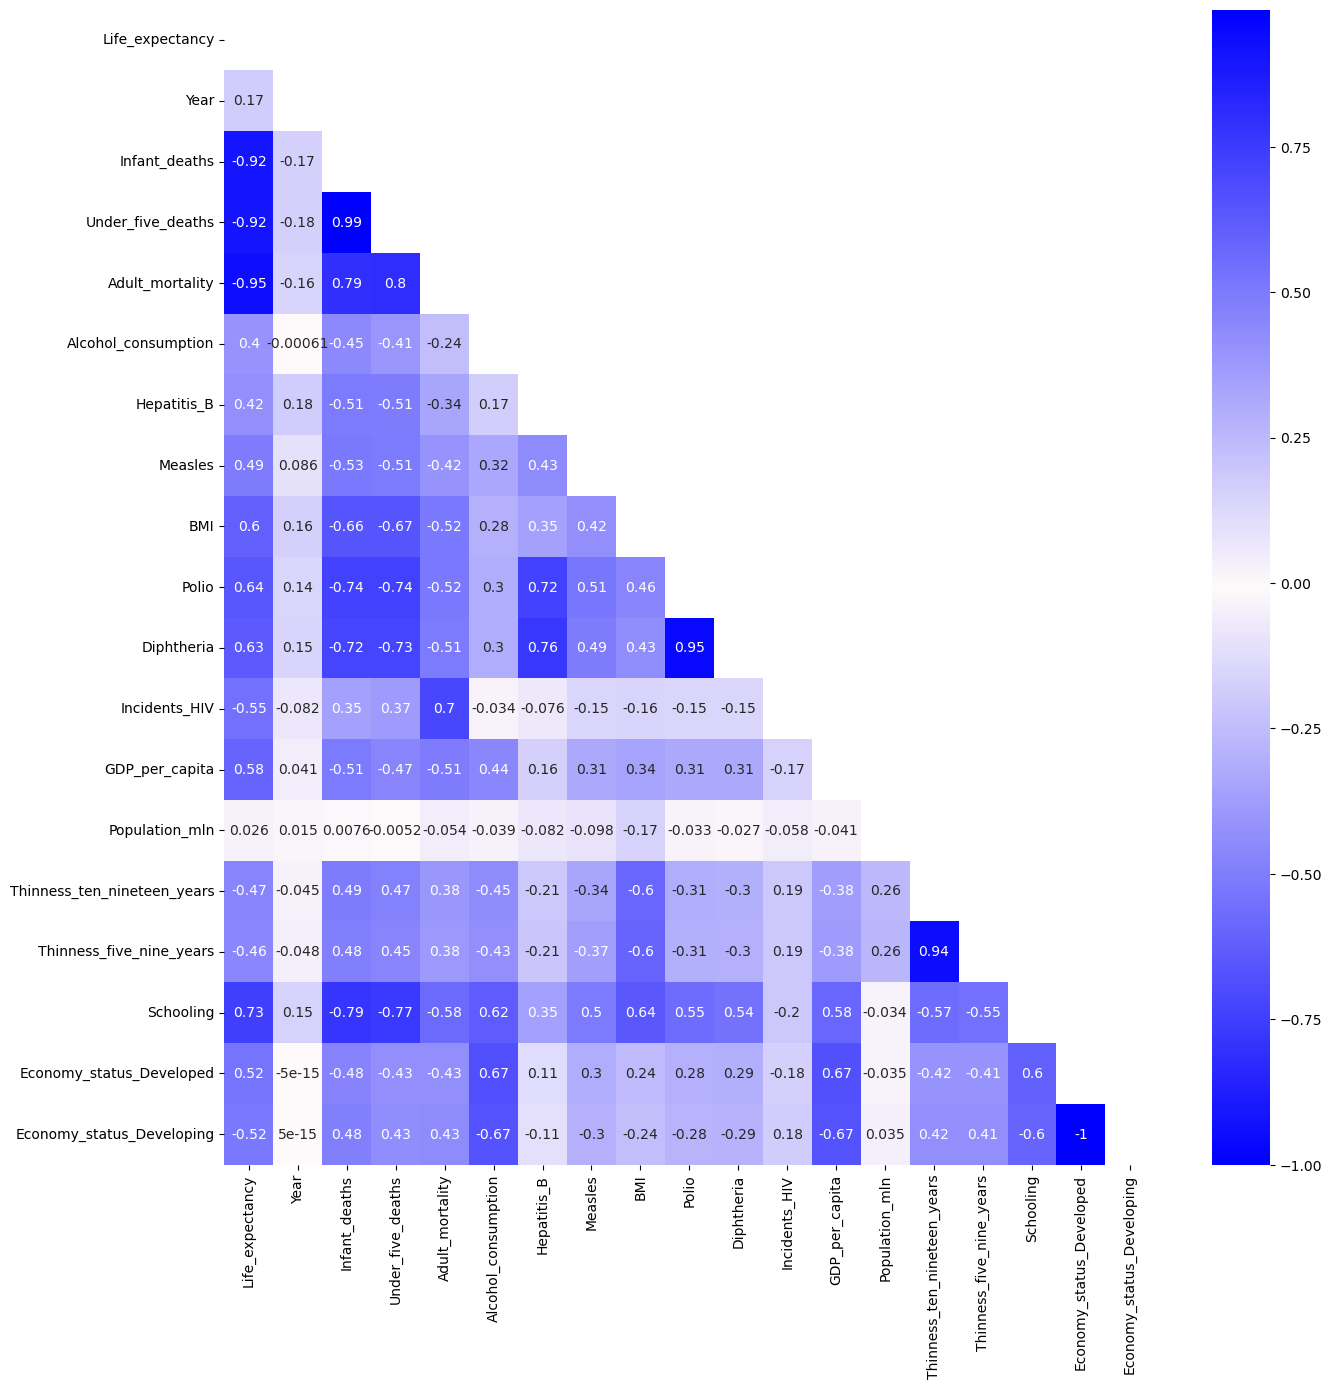

In [14]:
plt.figure(figsize = (15, 15))
cmap = LinearSegmentedColormap.from_list('', ['blue', 'snow', 'blue'])
sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))

plt.show()

In [15]:
df.columns

Index(['Life_expectancy', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing'],
      dtype='object')

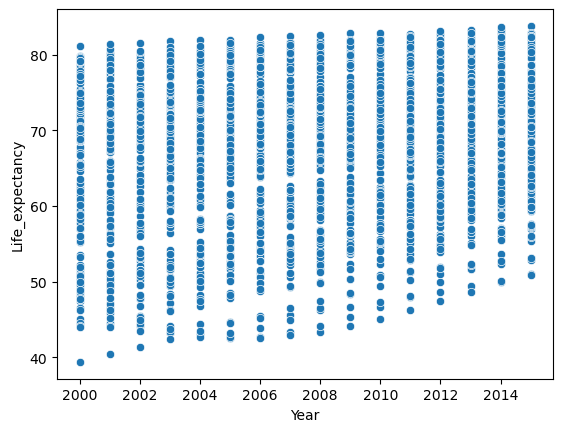

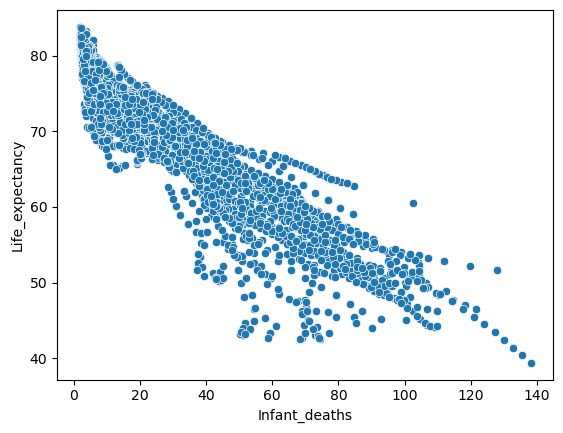

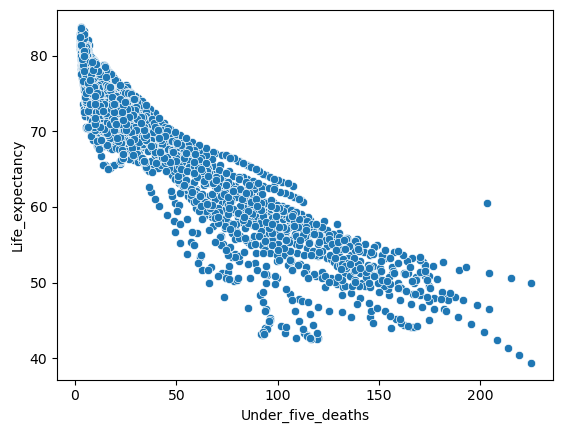

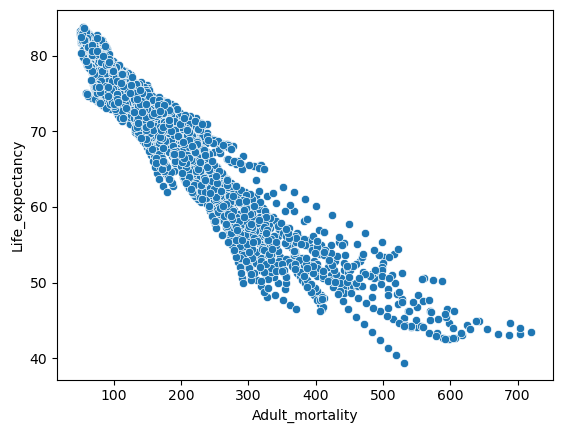

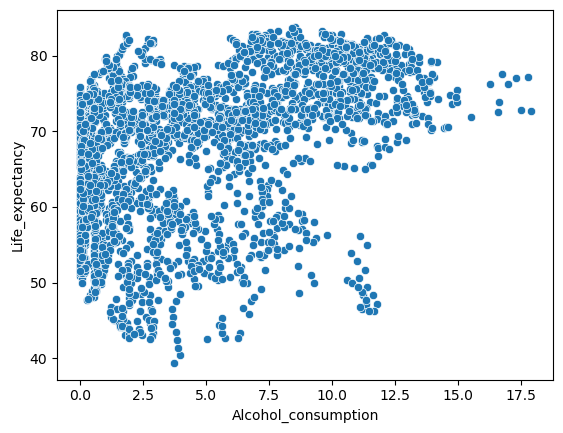

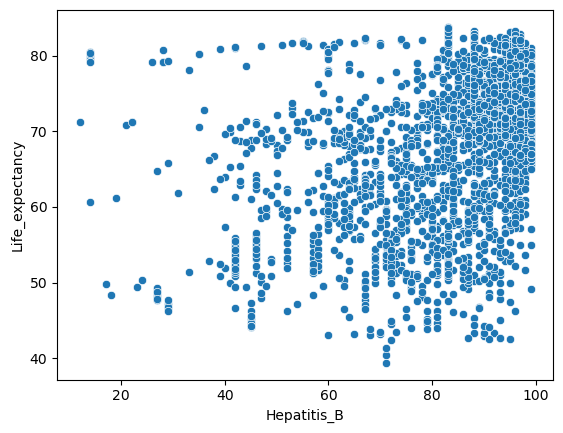

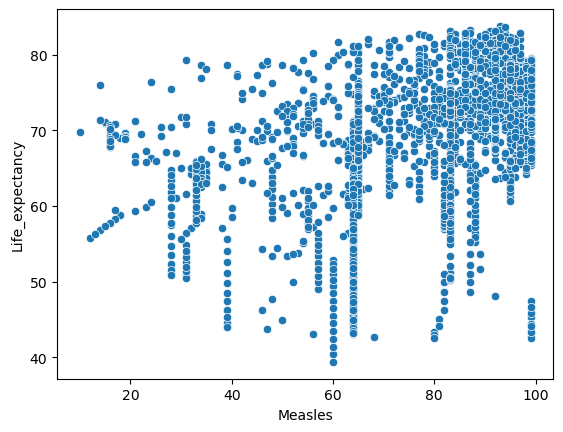

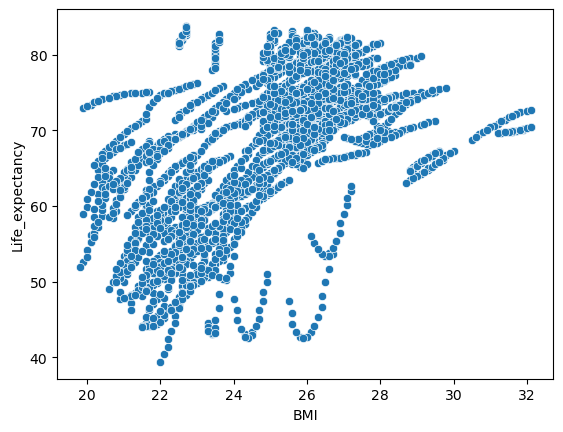

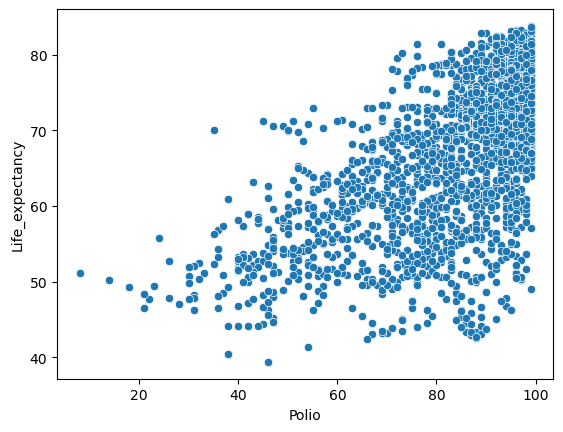

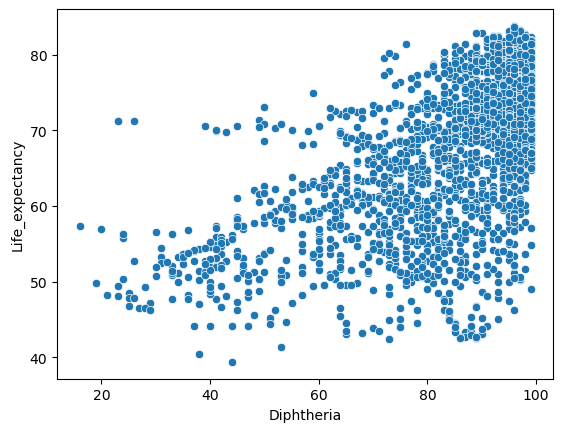

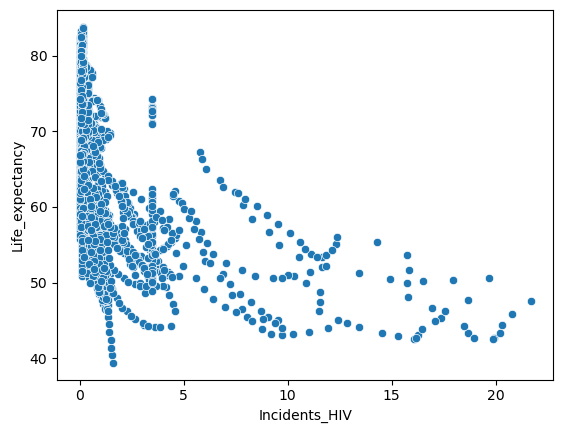

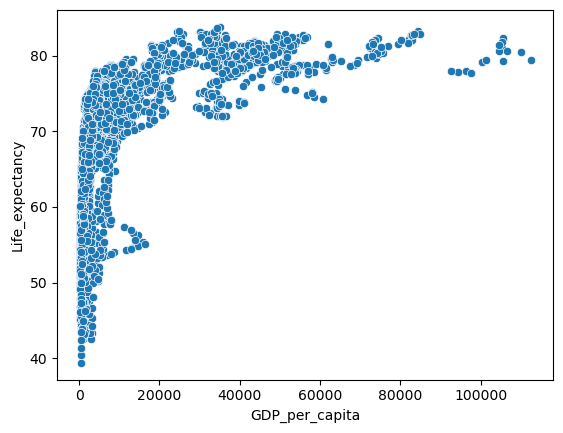

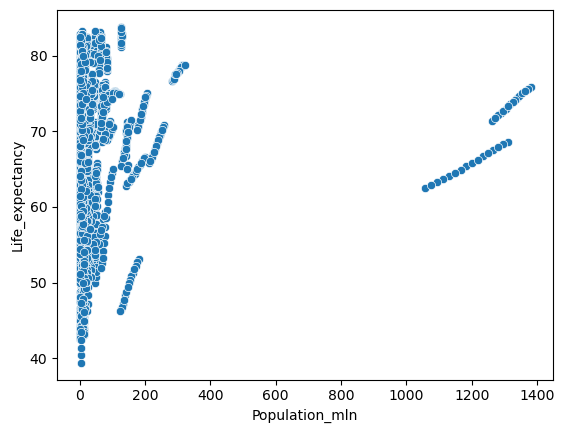

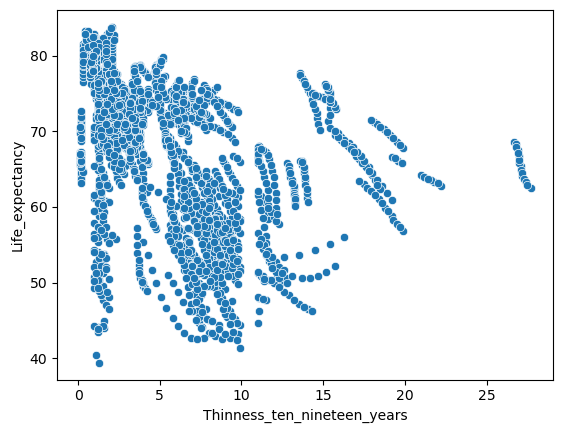

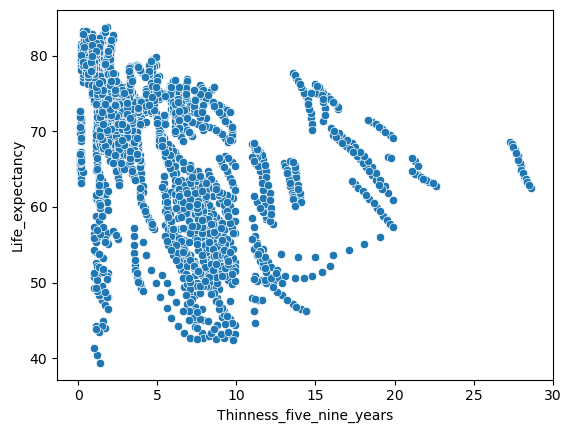

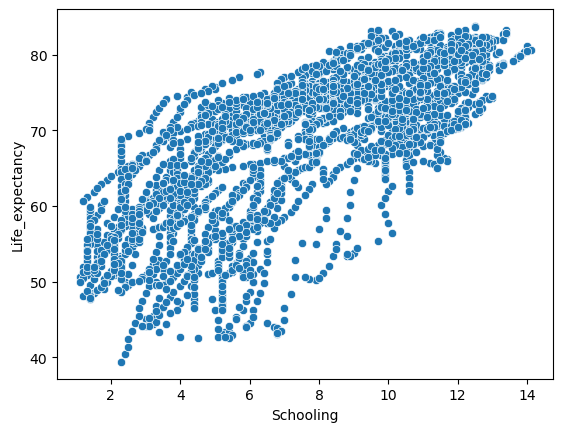

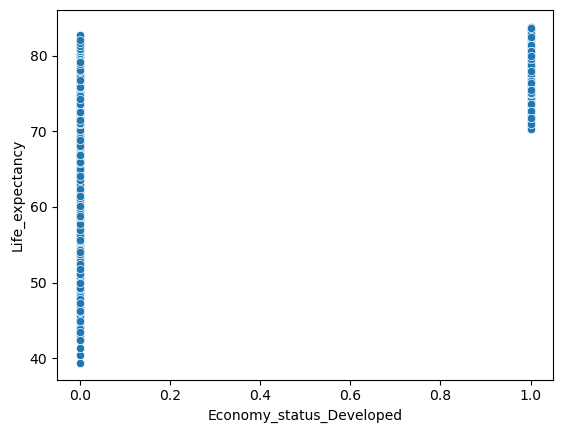

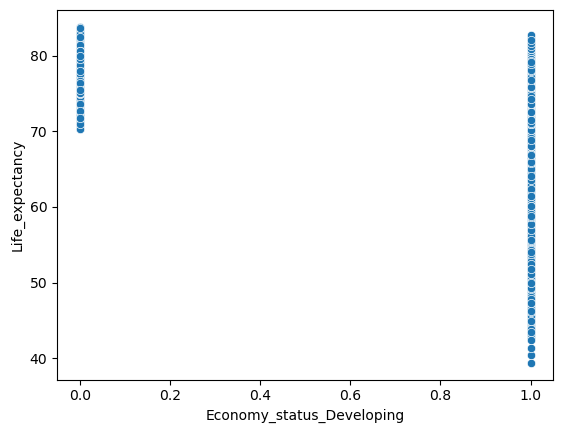

In [16]:
for column in df.iloc[:,2:]:
    sns.scatterplot(x= column,
                    y= 'Life_expectancy',
                    data = df)

    plt.show()

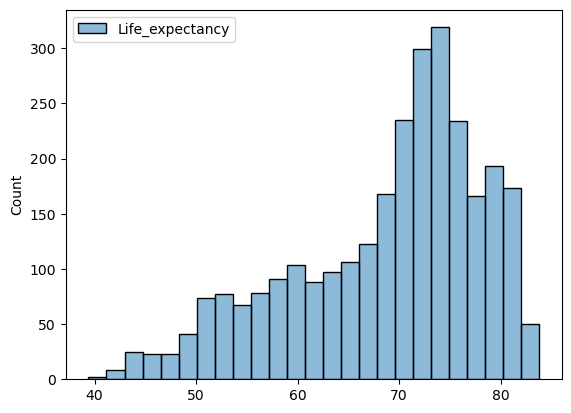

In [17]:
sns.histplot(df[['Life_expectancy']])

plt.show()

# 2) Train/Test Splitting

In [18]:
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')

In [19]:
feature_cols

['Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing']

In [20]:
X = df[feature_cols]
y = df['Life_expectancy']

In [21]:
X.head()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1
1,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0
2,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1
3,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1
4,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [23]:
df.dtypes

Life_expectancy                float64
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
dtype: object

In [24]:
df['Region'].value_counts()

Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64

In [25]:
def feature_eng(df):
    df = df.copy()
    df = pd.get_dummies(df, columns = ['Region'], drop_first=True, prefix = 'region')
    return df

In [26]:
X_train.head()

,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2739,Central America and Caribbean,2006,33.1,41.0,191.1225,2.36,89,83,25.6,90,89,0.19,3428,13.21,1.4,1.4,3.7,0,1
1139,Africa,2004,69.1,119.7,606.7310,5.76,93,99,25.8,88,86,19.93,2749,1.03,7.7,7.9,4.0,0,1
1726,European Union,2001,13.8,16.7,158.9380,11.07,93,85,25.3,94,94,0.02,3937,8.01,2.4,2.5,9.9,1,0
2593,Africa,2005,85.2,125.6,445.8890,0.85,76,64,23.1,87,76,2.33,1565,18.35,7.2,7.1,3.7,0,1
2072,Asia,2013,13.0,14.6,205.0770,3.80,99,99,26.2,98,98,0.13,10264,17.04,2.4,2.5,11.6,0,1


In [27]:
X_train_fe = feature_eng(X_train)

In [28]:
X_train_fe.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Economy_status_Developing,region_Asia,region_Central America and Caribbean,region_European Union,region_Middle East,region_North America,region_Oceania,region_Rest of Europe,region_South America
2739,2006,33.1,41.0,191.1225,2.36,89,83,25.6,90,89,...,0,1,0,1,0,0,0,0,0,0
1139,2004,69.1,119.7,606.7310,5.76,93,99,25.8,88,86,...,0,1,0,0,0,0,0,0,0,0
1726,2001,13.8,16.7,158.9380,11.07,93,85,25.3,94,94,...,1,0,0,0,1,0,0,0,0,0
2593,2005,85.2,125.6,445.8890,0.85,76,64,23.1,87,76,...,0,1,0,0,0,0,0,0,0,0
2072,2013,13.0,14.6,205.0770,3.80,99,99,26.2,98,98,...,0,1,1,0,0,0,0,0,0,0


In [29]:
X_train_fe.columns

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing', 'region_Asia',
       'region_Central America and Caribbean', 'region_European Union',
       'region_Middle East', 'region_North America', 'region_Oceania',
       'region_Rest of Europe', 'region_South America'],
      dtype='object')

In [30]:
feature_cols = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing', 'region_Asia',
       'region_Central America and Caribbean', 'region_European Union',
       'region_Middle East', 'region_North America', 'region_Oceania',
       'region_Rest of Europe', 'region_South America']

In [31]:
def linreg(fe_cols, y_train_cols):
    X = fe_cols
    y = y_train_cols
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    print(f'The intercept is {lr_model.intercept_}')
    labeled = list(zip(feature_cols, lr_model.coef_))
    print(f'The coefficients for the slope are {labeled}')
    return lr_model
    

In [32]:
life_expectancy = linreg(X_train_fe, y_train)

The intercept is 18.753086493780522
The coefficients for the slope are [('Year', 0.0331350858596341), ('Infant_deaths', -0.05740817008018942), ('Under_five_deaths', -0.04717930343692428), ('Adult_mortality', -0.04715552585766009), ('Alcohol_consumption', -0.0012785671121872079), ('Hepatitis_B', -0.006319902414997178), ('Measles', 0.0016088006190636479), ('BMI', -0.15607069168336224), ('Polio', 0.009260584988174189), ('Diphtheria', -0.008617510907269607), ('Incidents_HIV', 0.08918380556554867), ('GDP_per_capita', 1.9836965326335e-05), ('Population_mln', -0.00027795708803443186), ('Thinness_ten_nineteen_years', -0.03969819833938584), ('Thinness_five_nine_years', 0.025917652111483978), ('Schooling', 0.11444233288156178), ('Economy_status_Developed', 1.194227305311758), ('Economy_status_Developing', -1.1942273053120271), ('region_Asia', 0.33057373303894366), ('region_Central America and Caribbean', 1.894811924514029), ('region_European Union', -0.6893579878472347), ('region_Middle East', 0

In [33]:
y_train_pred = life_expectancy.predict(X_train_fe)
y_train_pred

array([69.20015377, 43.53646363, 73.31318731, ..., 65.95920036,
       73.72293814, 51.72629827])

In [46]:
y_train

2739    70.1
1139    42.7
1726    71.8
2593    50.1
2072    70.6
        ... 
2416    80.1
48      70.0
772     62.7
1848    73.0
1231    52.9
Name: Life_expectancy, Length: 2291, dtype: float64

In [35]:
## R2 of y_train prediction
life_expectancy.score(X_train_fe, y_train)

0.9839821823250833

In [48]:
rmse = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(rmse)

1.1946743869738272


In [42]:
## TEST
X_test_fe = feature_eng(X_test)

In [43]:
X_test_fe.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Economy_status_Developing,region_Asia,region_Central America and Caribbean,region_European Union,region_Middle East,region_North America,region_Oceania,region_Rest of Europe,region_South America
2826,2002,70.3,97.3,303.7545,3.65,60,83,23.5,54,48,...,0,1,0,1,0,0,0,0,0,0
2564,2003,60.0,81.2,248.7515,0.04,38,95,22.6,61,61,...,0,1,0,0,0,1,0,0,0,0
1864,2006,10.1,12.3,144.8485,7.70,99,68,25.7,99,99,...,0,1,0,1,0,0,0,0,0,0
2615,2000,59.9,98.5,480.3625,1.51,77,28,22.0,80,82,...,0,1,0,0,0,0,0,0,0,0
2473,2007,11.9,13.8,159.6640,7.25,99,99,26.0,99,99,...,0,1,0,0,0,0,0,0,0,0


In [50]:
y_test_pred = life_expectancy.predict(X_test_fe)

In [54]:
y_test_pred[0:5]

array([59.55064002, 61.57938319, 74.80654395, 50.16583264, 72.12510638])

In [52]:
len(y_test_pred)

573

In [53]:
y_test

2826    57.7
2564    62.4
1864    75.2
2615    50.9
2473    73.1
        ... 
2414    72.8
2325    62.2
1316    73.5
664     62.1
2121    70.1
Name: Life_expectancy, Length: 573, dtype: float64

In [ ]:
## R2 of y_test prediction 
linreg.score(X_test_fe, y_test)

0.9837177375723446

In [57]:
rmse_test = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
rmse_test

1.1816702342194794

# Metrics

In [58]:
## create new data frame with observed(actual) data and predicted data
life_df = pd.DataFrame({'y_actual': y_test, 'y_predicted': y_test_pred})

In [59]:
life_df.shape

(573, 2)

In [62]:
life_df.head()

,y_actual,y_predicted
2826,57.7,59.550640
2564,62.4,61.579383
1864,75.2,74.806544
2615,50.9,50.165833
2473,73.1,72.125106


In [63]:
## add difference columns with (y - y_pred)
life_df['difference'] = life_df['y_actual'] - life_df['y_predicted']

In [64]:
life_df.head()

,y_actual,y_predicted,difference
2826,57.7,59.550640,-1.850640
2564,62.4,61.579383,0.820617
1864,75.2,74.806544,0.393456
2615,50.9,50.165833,0.734167
2473,73.1,72.125106,0.974894


In [65]:
## create absolute difference column
life_df['abs_difference'] =  abs(life_df['difference'])

In [66]:
life_df.head()

,y_actual,y_predicted,difference,abs_difference
2826,57.7,59.550640,-1.850640,1.850640
2564,62.4,61.579383,0.820617,0.820617
1864,75.2,74.806544,0.393456,0.393456
2615,50.9,50.165833,0.734167,0.734167
2473,73.1,72.125106,0.974894,0.974894


In [67]:
## MAE
life_df['abs_difference'].mean()

0.9362828407632537

In [81]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mae

0.9362828407632537

In [68]:
## create squared error column with (y-y_pred)**2
life_df['squared_error'] = life_df['difference']**2

In [69]:
life_df.head()

,y_actual,y_predicted,difference,abs_difference,squared_error
2826,57.7,59.550640,-1.850640,1.850640,3.424868
2564,62.4,61.579383,0.820617,0.820617,0.673412
1864,75.2,74.806544,0.393456,0.393456,0.154808
2615,50.9,50.165833,0.734167,0.734167,0.539002
2473,73.1,72.125106,0.974894,0.974894,0.950418


In [85]:
## MSE
life_df['squared_error'].mean()

1.3963445424403191

In [87]:
mse = metrics.mean_squared_error(y_test, y_test_pred, squared = True)
mse

1.3963445424403191

In [88]:
## RMSE
np.sqrt(mse)

1.1816702342194794

In [89]:
rmse_test

1.1816702342194794

In [70]:
## create column with (y - (y_mean))
life_df['difference_from_mean_squared'] = (life_df['y_actual'] - life_df['y_actual'].mean())**2

In [71]:
life_df['y_actual'].mean() # the mean of y

68.83455497382198

In [72]:
life_df.head()

,y_actual,y_predicted,difference,abs_difference,squared_error,difference_from_mean_squared
2826,57.7,59.550640,-1.850640,1.850640,3.424868,123.978314
2564,62.4,61.579383,0.820617,0.820617,0.673412,41.403498
1864,75.2,74.806544,0.393456,0.393456,0.154808,40.518890
2615,50.9,50.165833,0.734167,0.734167,0.539002,321.648262
2473,73.1,72.125106,0.974894,0.974894,0.950418,18.194021


In [73]:
## SST
SST = life_df['difference_from_mean_squared'].sum()
SST

49139.69581151832

In [74]:
## SSE
SSE = life_df['squared_error'].sum()
SSE

800.1054228183028

In [75]:
## SSR
SSR = SST - SSE
SSR

48339.59038870002

In [82]:
life_df['predicted_difference_from_mean_squared'] = (life_df['y_predicted'] - life_df['y_actual'].mean())**2

In [83]:
life_df['predicted_difference_from_mean_squared'].sum()

47792.18856102791